#  《利用Python进行数据分析》1st Edition chapter 8

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import os

## Figure 和 Subplot

matplotlib API docs: https://matplotlib.org/api/index.html

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [3]:
ax1 = fig.add_subplot(2, 2, 1)    #图像是 2 * 2的， 并且当前选中4个subplot中的第一个，编号从1开始

In [4]:
ax2 = fig.add_subplot(2, 2, 2)

In [5]:
ax3 = fig.add_subplot(2, 2, 3)

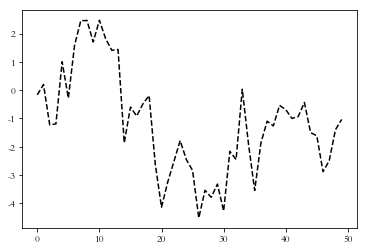

In [6]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [7]:
type(ax3)

matplotlib.axes._subplots.AxesSubplot

In [8]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [9]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

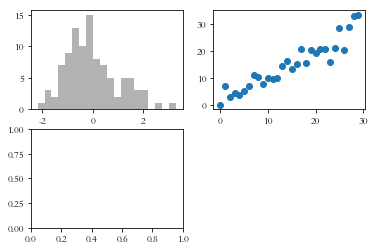

In [10]:
fig

In [11]:
ax3.plot(np.random.randn(50).cumsum(), 'k--')

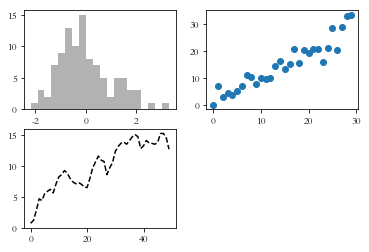

In [12]:
fig

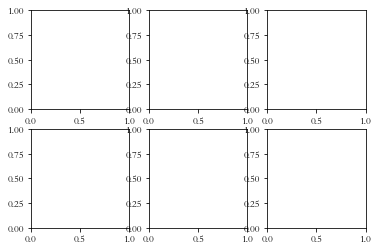

In [13]:
fig, axes = plt.subplots(2, 3)

In [14]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BC27E80>,
      dtype=object)

In [15]:
# 利用 subplots_adjust() 调整subplot之间的间距, 此外该函数还是个顶级函数
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)   # wspace和hspace用于控制宽度和高度的百分比

<Figure size 432x288 with 0 Axes>

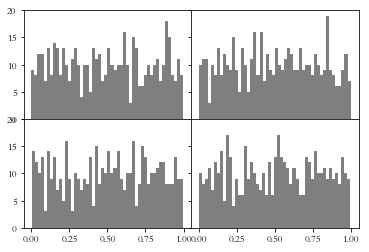

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.rand(500), bins=50, color='k', alpha=0.5)
        
plt.subplots_adjust(wspace=0, hspace=0)

In [17]:
"""
    u'参数说明'： axes.hist()    -- create a histogram  (直方图)
                bins : int or sequence or str
                color : color or array_like of colors or None, optional
                orientation : {'horizontal', 'vertical'}, optiona
                histtype : {'bar', 'barstacked', 'step', 'stepfilled'}, optional
""" 

"\n    u'\xe5\x8f\x82\xe6\x95\xb0\xe8\xaf\xb4\xe6\x98\x8e'\xef\xbc\x9a axes.hist()    -- create a histogram  (\xe7\x9b\xb4\xe6\x96\xb9\xe5\x9b\xbe)\n                bins : int or sequence or str\n                color : color or array_like of colors or None, optional\n                orientation : {'horizontal', 'vertical'}, optiona\n                histtype : {'bar', 'barstacked', 'step', 'stepfilled'}, optional\n"

In [18]:
from numpy.random import randn

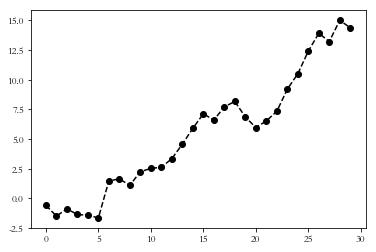

In [19]:
plt.figure()
#fmt 参数的说明详见 https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot 中的Notes section
plt.plot(randn(30).cumsum(), 'ko--')    

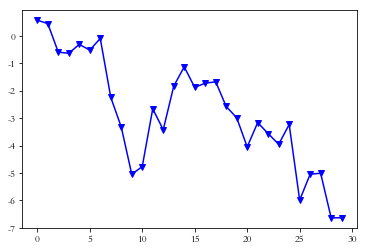

In [20]:
plt.plot(randn(30).cumsum(), 'bv-')     #fmt格式举例： b : blue, v : triangle down  - : solid line

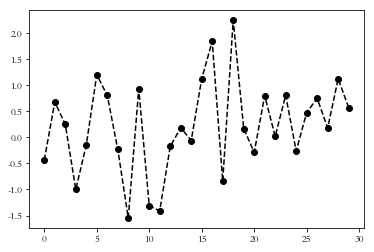

In [21]:
#或者可以将格式更加明确地写出：
plt.plot(randn(30), color='k', linestyle='dashed', marker='o')

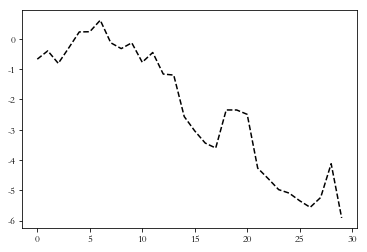

In [22]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

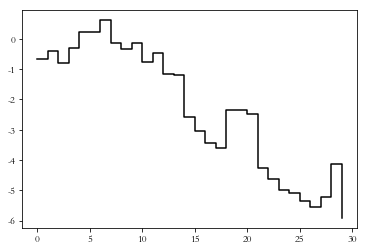

In [23]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

## 刻度、标签 和 图例

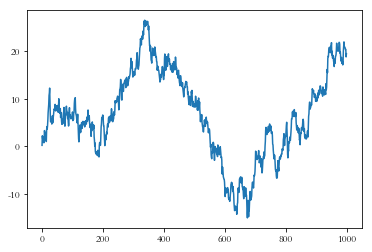

In [24]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

In [25]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5,3.2,'Stages')

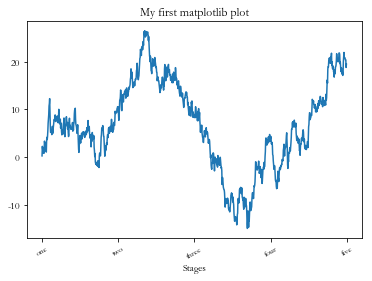

In [26]:
fig

In [27]:
from matplotlib.font_manager import _rebuild
_rebuild()

Text(0.5,0,u'\u9636\u6bb5')

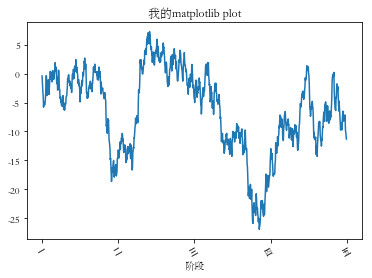

In [28]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels([u'一', u'二', u'三', u'四', u'五'],
                            rotation=30, fontsize='small')
ax.set_title(u'我的matplotlib plot')
ax.set_xlabel(u'阶段')

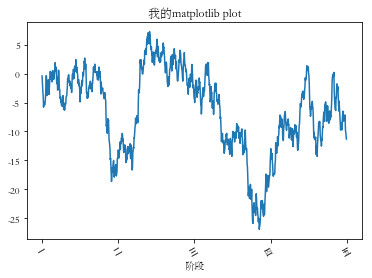

In [29]:
fig